In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# No data for train_data is missing
Col_with_missing = [col for col in train_data.columns if train_data[col].isnull().any()]
print(Col_with_missing)

[]


In [5]:
# No data for test_data is missing
Col_with_missing = [col for col in test_data.columns if test_data[col].isnull().any()]
print(Col_with_missing)

[]


In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y_train = train_data["label"]

# Drop 'label' column
X_train = train_data.drop(["label"],axis = 1) 

In [8]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

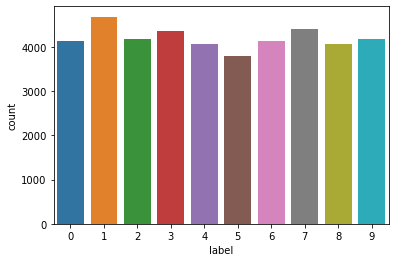

In [9]:
import seaborn as sns
%matplotlib inline
sns.countplot(Y_train)

In [10]:
img_row=28
img_col=28
def data_prep_X(X):
    num_img=len(X)
    x_as_array=X.values.reshape(num_img,img_row,img_col,1)
    X_out=x_as_array/255
    return X_out

In [11]:
from keras.utils.np_utils import to_categorical
num_classes=10
def data_prep_Y(Y):
    out_y = to_categorical(Y, num_classes)
    return out_y

Using TensorFlow backend.


In [12]:
X_train = data_prep_X(X_train)
test_data = data_prep_X(test_data)
Y_train = data_prep_Y(Y_train)

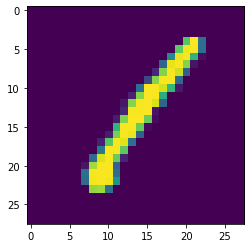

In [13]:
# Some examples images
import matplotlib.pyplot as plt
g = plt.imshow(X_train[0][:,:,0])

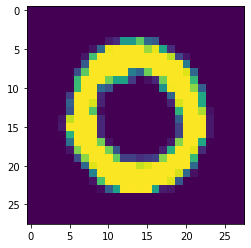

In [14]:
g = plt.imshow(X_train[1][:,:,0])

In [15]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_row, img_col, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=128,
          epochs=30,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 6s 185us/sample - loss: 0.2315 - accuracy: 0.9322 - val_loss: 0.0797 - val_accuracy: 0.9737
Epoch 2/30
33600/33600 [==============================] - 1s 44us/sample - loss: 0.0613 - accuracy: 0.9814 - val_loss: 0.0562 - val_accuracy: 0.9823
Epoch 3/30
33600/33600 [==============================] - 1s 44us/sample - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0533 - val_accuracy: 0.9844
Epoch 4/30
33600/33600 [==============================] - 2s 49us/sample - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0534 - val_accuracy: 0.9830
Epoch 5/30
33600/33600 [==============================] - 1s 44us/sample - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0548 - val_accuracy: 0.9836
Epoch 6/30
33600/33600 [==============================] - 1s 44us/sample - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 7/30
33600/33600 [==============================] 

In [16]:
# predict results
results = model.predict(test_data)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [17]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mySubmission.csv",index=False)